## Mini-project task with linear regression in multidimensional input space and batch learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [92]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


**Plot data & divide into test and training**

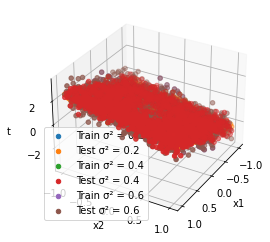

In [93]:
# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noice, σ2 ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility, and 42 is the answer to everything :)
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
training_data = np.logical_or(np.abs(X1) <= 0.3, np.abs(X2) <= 0.3)
test_data = np.logical_or(np.abs(X1) > 0.3, np.abs(X2) > 0.3)

# train on the training data (obviously)
for sigma in sigma_values_squared:
    t = w[0] + w[1] * X1 + w[2] * X2 + np.random.normal(0, sigma, size=X1.shape)
    ax.scatter(X1[training_data], X2[training_data], t[training_data], label=f"Train σ² = {sigma}")
    ax.scatter(X1[test_data], X2[test_data], t[test_data], label=f"Test σ² = {sigma}")

# add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

# change the view angle
ax.view_init(elev=30, azim=30)

plt.show()


ValueError: operands could not be broadcast together with shapes (840,) (1537,) 

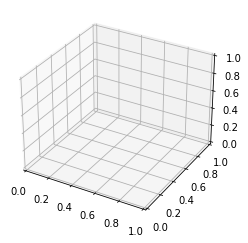

In [94]:
# x1 and x2 are limited to [-1, 1]x[-1, 1] with a step of 0.05
x1_train = np.arange(-1, 1.05, 0.05)
x2_train = np.arange(-1, 1.05, 0.05)
X1_train, X2_train = np.meshgrid(x1_train, x2_train)

x1_test = np.arange(-1, 1.05, 0.05)
x2_test = np.arange(-1, 1.05, 0.05)
X1_test, X2_test = np.meshgrid(x1_test, x2_test)

# assumed values of weight vector
w = [0, 1.5, -0.8]

# values of data noice, σ2 ∈ {0.2, 0.4, 0.6}
sigma_values_squared = [0.2, 0.4, 0.6]

# set seed for reproducibility, and 42 is the answer to everything :)
np.random.seed(42) 

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# divide into training data and test data
train_indices = np.logical_or(np.abs(X1_train) <= 0.3, np.abs(X2_train) <= 0.3)
test_indices = np.logical_or(np.abs(X1_test) > 0.3, np.abs(X2_test) > 0.3)

# calculate the target values for training and test data
train_targets = w[0] + w[1] * X1_train + w[2] * X2_train
test_targets = w[0] + w[1] * X1_test + w[2] * X2_test

# fit the model using maximum likelihood on the training data
train_predictions = train_targets[train_indices].flatten()  # point estimates of predicted t

# Calculate the mean squared error (MSE) on the test data
mse_values = []
for sigma in sigma_values_squared:
    test_predictions = train_predictions + np.random.normal(0, sigma, size=train_predictions.shape)
    mse = np.mean((test_predictions - test_targets[test_indices].flatten()) ** 2)
    mse_values.append(mse)
    
# Print the MSE values for different sigma values
for i, sigma in enumerate(sigma_values_squared):
    print(f"MSE (σ² = {sigma}) = {mse_values[i]}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model parameters
w = np.array([0, 1.5, -0.8])
sigma_values_squared = [0.2, 0.4, 0.6]

# Set seed for reproducibility
np.random.seed(42)

# Generate the training and test data
x1_train = np.arange(-1, 1.05, 0.05)
x2_train = np.arange(-1, 1.05, 0.05)
X1_train, X2_train = np.meshgrid(x1_train, x2_train)

x1_test = np.arange(-1, 1.05, 0.05)
x2_test = np.arange(-1, 1.05, 0.05)
X1_test, X2_test = np.meshgrid(x1_test, x2_test)

# Create boolean indices for training and test data
train_indices = np.logical_or(np.abs(X1_train) <= 0.3, np.abs(X2_train) <= 0.3)
test_indices = np.logical_or(np.abs(X1_test) > 0.3, np.abs(X2_test) > 0.3)

# Calculate the target values for training and test data
train_targets = w[0] + w[1] * X1_train + w[2] * X2_train
test_targets = w[0] + w[1] * X1_test + w[2] * X2_test

# Fit the model using least squares on the training data
X_train = np.column_stack((np.ones_like(X1_train.flatten()), X1_train.flatten(), X2_train.flatten()))
w_hat = np.linalg.inv(X_train[train_indices].T @ X_train[train_indices]) @ X_train[train_indices].T @ train_targets[train_indices]

# Predict the test data using the estimated weights
X_test = np.column_stack((np.ones_like(X1_test.flatten()), X1_test.flatten(), X2_test.flatten()))
test_predictions = X_test[test_indices] @ w_hat

# Calculate the mean squared error (MSE) on the test data
mse_values = []
for sigma_squared in sigma_values_squared:
    test_noisy = test_predictions + np.random.normal(0, np.sqrt(sigma_squared), size=test_predictions.shape)
    mse = np.mean((test_noisy - test_targets[test_indices].flatten()) ** 2)
    mse_values.append(mse)

# Print the MSE values for different sigma values
for i, sigma_squared in enumerate(sigma_values_squared):
    print(f"MSE (σ² = {sigma_squared}) = {mse_values[i]}")
